In [1]:
!pip install gymnasium

In [2]:
import numpy as np

In [3]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display

In [4]:
env = gym.make("FrozenLake-v1",map_name="4x4",render_mode="rgb_array", is_slippery = False)

In [5]:
env.observation_space

Discrete(16)

In [6]:
env.action_space

Discrete(4)

In [7]:
action_dict = {0:"Left",1:"Down",2:"Right",3:"Up"}

In [8]:
observation, _ = env.reset()

In [9]:
observation

0

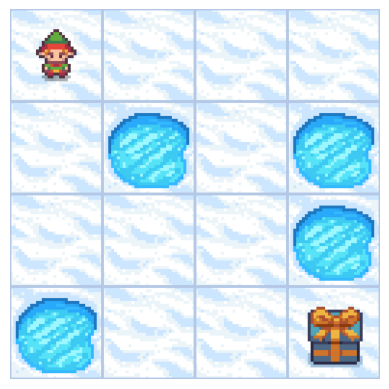

In [10]:
def render_board():
  plt.imshow(env.render())
  plt.axis('off')
  plt.show()

render_board()

In [11]:
action = env.action_space.sample()

In [12]:
observation, reward, done, truncated, _ = env.step(action)

In [13]:
observation,reward

(0, 0)

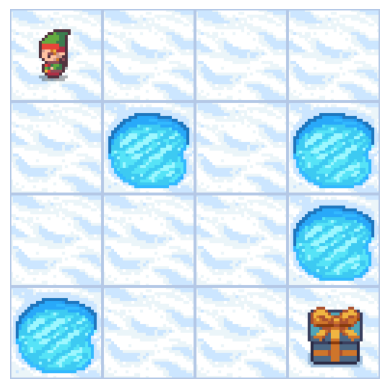

In [14]:
render_board()

In [15]:
mdp = env.unwrapped.P
mdp

{0: {0: [(1.0, 0, 0, False)],
  1: [(1.0, 4, 0, False)],
  2: [(1.0, 1, 0, False)],
  3: [(1.0, 0, 0, False)]},
 1: {0: [(1.0, 0, 0, False)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 2, 0, False)],
  3: [(1.0, 1, 0, False)]},
 2: {0: [(1.0, 1, 0, False)],
  1: [(1.0, 6, 0, False)],
  2: [(1.0, 3, 0, False)],
  3: [(1.0, 2, 0, False)]},
 3: {0: [(1.0, 2, 0, False)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 3, 0, False)],
  3: [(1.0, 3, 0, False)]},
 4: {0: [(1.0, 4, 0, False)],
  1: [(1.0, 8, 0, False)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 0, 0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 10, 0, False)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 2, 0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0, False)],
  1: [(1.0, 12, 0, True)],
  2: [(1.0, 9, 0, False)],
  3: [(1.0, 4, 0, False)]},
 9: 

In [16]:
env = gym.make("FrozenLake-v1",map_name="4x4",render_mode="rgb_array", is_slippery = False)

In [17]:
env.unwrapped.P

{0: {0: [(1.0, 0, 0, False)],
  1: [(1.0, 4, 0, False)],
  2: [(1.0, 1, 0, False)],
  3: [(1.0, 0, 0, False)]},
 1: {0: [(1.0, 0, 0, False)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 2, 0, False)],
  3: [(1.0, 1, 0, False)]},
 2: {0: [(1.0, 1, 0, False)],
  1: [(1.0, 6, 0, False)],
  2: [(1.0, 3, 0, False)],
  3: [(1.0, 2, 0, False)]},
 3: {0: [(1.0, 2, 0, False)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 3, 0, False)],
  3: [(1.0, 3, 0, False)]},
 4: {0: [(1.0, 4, 0, False)],
  1: [(1.0, 8, 0, False)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 0, 0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 10, 0, False)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 2, 0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0, False)],
  1: [(1.0, 12, 0, True)],
  2: [(1.0, 9, 0, False)],
  3: [(1.0, 4, 0, False)]},
 9: 

In [18]:
import numpy as np

env = gym.make("FrozenLake-v1",map_name="4x4",render_mode="rgb_array",is_slippery=False)


policy = np.random.randint(low=0,high=env.action_space.n,size=(env.observation_space.n))


def print_policy(policy,grid=(4,4)):
  policy_print = np.empty(grid).astype(str)
  for idx_h in range(grid[0]):
    for idx_w in range(grid[1]):
      index = idx_h * grid[0] + idx_w
      selected_action = action_dict[policy[index]]
      selected_action = selected_action[0]
      policy_print[idx_h,idx_w] = selected_action

  print("Current Policy:")
  print("---------------")
  print(policy_print)

print_policy(policy)






Current Policy:
---------------
[['U' 'D' 'U' 'L']
 ['R' 'R' 'U' 'U']
 ['R' 'U' 'U' 'D']
 ['R' 'L' 'R' 'L']]


In [23]:
def policy_evaluation(policy,gamma= 0.99, iterations =1000, tol=1e-10):

  V = np.zeros(env.observation_space.n)

  for _ in range(iterations):
    V_k = np.copy(V)

    for s in range(env.observation_space.n):

      action = policy[s]
      probability, s_next, reward , terminal = env.unwrapped.P[s]
      V[s] = probability * (reward + gamma * V_k[s])


    if np.max(np.abs(V-V_k)) < tol:
      break

  return V


values = policy_evaluation(policy)




In [35]:
def policy_improvement(V,gamma=0.99):
  new_policy = np.zeros(env.observation_space.n)

  for s in range(env.observation_space.n):

    q_sa = []

    for action in range(env.action_space.n):
      probability, s_next, reward , terminal = env.unwrapped.P[s][action][0]

      Q = probability * (reward + gamma * values[s_next])

      q_sa.append(Q)


  best_action = np.argmax(q_sa)

  new_policy[s]  = best_action

  return new_policy


policy_improvement(values)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
def policy_iteration(env,num_iterations=1000,gamma=0.99):
  policy = np.random.randint(low=0,high=env.action_space.n, size=(env.observation_space.n))

  for _ in range(num_iterations):
    values = policy_evaluation(policy, gamma=gamma, iterations=num_iterations)
    updated_policy = policy_improvement(values,gamma=gamma)

    if np.all(policy == updated_policy):
      break

    policy = updated_policy

  return policy

learned_policy = policy_iteration(env,gamma=0.99)

print_policy(learned_policy)

Current Policy:
---------------
[['L' 'L' 'L' 'L']
 ['L' 'L' 'L' 'L']
 ['L' 'L' 'L' 'L']
 ['L' 'L' 'L' 'L']]


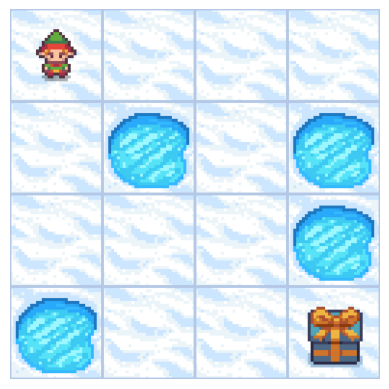

Selected Actions: Left


KeyboardInterrupt: Interrupted by user

In [37]:
from IPython.core.display import clear_output
observation, _ = env.reset()

render_board()


# Game loop

for _ in range(10):

  # Select Action from Policy

  action = int(learned_policy[observation])
  print(f"Selected Actions: {action_dict[action]}")

  input("Press Enter to Continue ")


  # Take the action and update the enviroment state

  observation, reward, done, _ , _  = env.step(action)

  clear_output()
  render_board()

  if done:
    print(f"Game over. Reward: {reward}")

    break

env.close()


In [47]:
env = gym.make('FrozenLake-v1',map_name='4x4',render_mode="rgb",is_slippery = False)


def policy_evaluation(policy, gamma=0.99,iteration=1000,tol=1e-10):

  V = np.zeros(env.observation_space.n)

  for _ in range(iteration):

    V_k = np.copy(V)

    for s in range(env.observation_space.n):

      q_sa = []

      wanted_action = policy[s]

      possible_taken_actions = env.unwrapped.P[s][wanted_action]

      Q_sa = 0

      for prob, s_next, reward, terminal in possible_taken_actions:
        Q_sa += prob * (reward + gamma * values[s_next])

      q_sa.append(Q_sa)

      V_s = 0


      for prob, s_next, reward, terminal in possible_taken_actions:
        V_s += prob * (reward + gamma * V_k[s_next])

      V[s] = V_s


    if np.max(np.abs(V-V_k))  < tol:
      break


  return V



values = policy_evaluation(policy)
print_policy(learned_policy)



Current Policy:
---------------
[['L' 'L' 'L' 'L']
 ['L' 'L' 'L' 'L']
 ['L' 'L' 'L' 'L']
 ['L' 'L' 'L' 'L']]


In [49]:
num_games = 1000

max_steps = 500


game_successes = 0

for _ in range(num_games):

  observation, _ = env.reset()

  for _ in range(max_steps):
    action = int(learned_policy[observation])

    observation , reward , done , truncate, _ = env.step(action)

    if done or truncate:

      if reward > 0:
        game_succes += 1
      break


game_successes / num_games



0.0